# DSCI 619: Deep Learning
## Final Project: Part 1

Symphony Hopkins

##Introduction

We are part of a data scientist team in an AI company. We were given a dataset of images containing over 15,000 images of indoor locations. The dataset was originally from MIT built to tackle the problem of indoor scene recognition. All images are in JPEG format and have been divided into 67 categories. The number of images per category varies. However, there are at least 100 images for each category. 

There are some issues of image quality in the following folder 

+ Laboratorywet
+ Laundromat
+ Library
+ Livingroom
+ Lobby
+ locker_room

We will remove these folders to avoid program crashes. Removing these folders will leave us with 61 categories.

Our objective is to create the most optimal convolutional neural network (CNN) to classify the indoor locations.

Data Source: [MIT Indoor Scenes](https://www.kaggle.com/datasets/itsahmad/indoor-scenes-cvpr-2019)

##1.Download the dataset that is about 3GB from Kaggle into the local disk and unzip it.


First, we will find the directory that contains the indoor images.

In [ ]:
#importing libraries
import os 
import pathlib
from glob import glob
import random
import numpy as np
import PIL #Python Imaging Library
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report
import numpy as np

In [ ]:
#finding image files
img_dir = '/Users/symphonyhopkins/Documents/Maryville_University/DSCI_619/Final Project/archive/indoorCVPR_09/Images'
img_dir = pathlib.Path(img_dir)

#checking directories to ensure we have the correct # of images for each class
total_files = 0
for root, dirs, files in os.walk(str(img_dir)):
    level = root.replace(str(img_dir), '').count(os.sep)
    indent = ' ' * 4 * (level)
    print(f'{indent}{os.path.basename(root)}/ ({len(files)} files)')
    total_files += len(files)
print(f'There are {total_files} images in this dataset')

#retrieving labels
indoor_dir = sorted([ name for name in list(os.listdir(img_dir)) if os.path.isdir(os.path.join(img_dir, name)) ])
print(f' Indoor Labels: {indoor_dir}')

Images/ (1 files)
    meeting_room/ (233 files)
    bedroom/ (662 files)
    restaurant/ (513 files)
    concert_hall/ (103 files)
    pantry/ (384 files)
    church_inside/ (180 files)
    florist/ (103 files)
    toystore/ (347 files)
    children_room/ (112 files)
    greenhouse/ (101 files)
    bakery/ (405 files)
    office/ (109 files)
    corridor/ (346 files)
    dentaloffice/ (131 files)
    bathroom/ (197 files)
    stairscase/ (155 files)
    gameroom/ (127 files)
    bowling/ (213 files)
    casino/ (515 files)
    bookstore/ (380 files)
    tv_studio/ (166 files)
    dining_room/ (274 files)
    grocerystore/ (213 files)
    restaurant_kitchen/ (107 files)
    fastfood_restaurant/ (116 files)
    classroom/ (113 files)
    jewelleryshop/ (157 files)
    hospitalroom/ (101 files)
    prisoncell/ (103 files)
    cloister/ (120 files)
    clothingstore/ (106 files)
    shoeshop/ (116 files)
    studiomusic/ (108 files)
    poolinside/ (174 files)
    operating_room/ (135 file

As we can see there are at least 100 images per category, but this dataset is imbalanced, so we cannot simply look at accuracy to evaluate the models. 

Let's check three images from different folders to check if they were successfully imported.

(Image size  = (500, 335, 3) ; Indoor Scene = airport_inside)


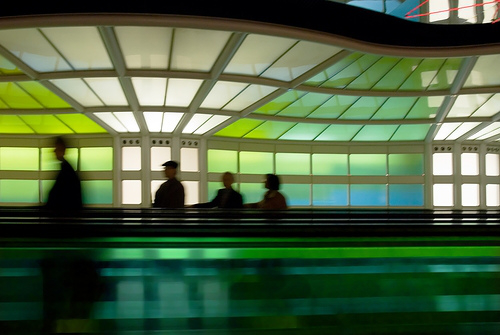

(Image size  = (300, 225, 3) ; Indoor Scene = artstudio)


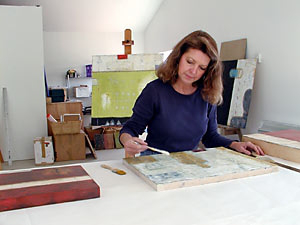

(Image size  = (600, 450, 3) ; Indoor Scene = auditorium)


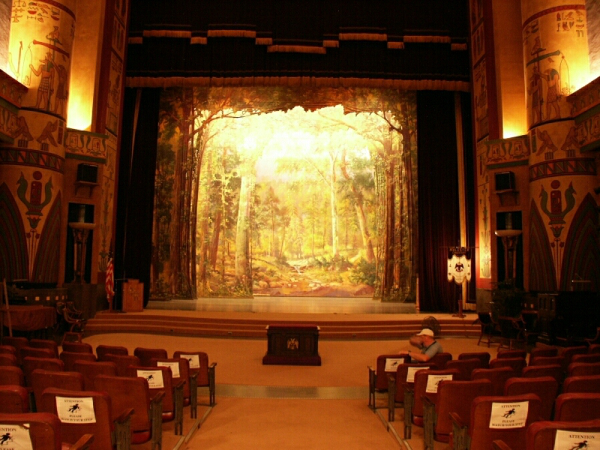

In [ ]:
#fixing seed to reproduce results
SEED = 1001
os.environ['PYTHONHASHSEED']=str(SEED)
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'  # new flag present in tf 2.0+
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

from IPython.display import display
#loop over the first three indoor scene labels to display images
for i in range(3):
    #/* get all imgage files
    image_file = list(img_dir.glob(indoor_dir[i]+'/*'))
    # we open the first image  only using PIL library for handleing 3D data
    img = PIL.Image.open(str(image_file[0]))
    # channel number= img.mode
    print(f'(Image size  = ({img.size[0]}, {img.size[1]}, {len(img.mode)}) ; Indoor Scene = {indoor_dir[i]})')
    display(img)

As we can see, the images are different sizes. For our model, we need the images to be the same size, so we will preprocess them while performing the train-test split (80% training - 20% test). 

In [ ]:
#setting parameters for preprocessing function
batch_size = 16
image_height = 256
image_width = 256
train_test_split = 0.2

In [ ]:
#training dataset
train_data = tf.keras.preprocessing.image_dataset_from_directory(
  img_dir, # parent folder contains all the folders contaning fruits
  labels='inferred', # labels are generated from the directory structure
  label_mode='int', #'int': means that the labels are encoded as integers (e.g. for sparse_categorical_crossentropy loss).
  validation_split= train_test_split,
  subset="training",
  seed= 1001, #fix the seed
  image_size=(image_height, image_width),
  batch_size=batch_size)


Found 14056 files belonging to 61 classes.
Using 11245 files for training.


In [ ]:
#validation datase
val_data = tf.keras.preprocessing.image_dataset_from_directory(
  img_dir,
  labels='inferred',
  label_mode='int',
  validation_split= train_test_split,
  subset="validation",
  seed=1001,
  image_size=(image_height, image_width),
  batch_size=batch_size)

Found 14056 files belonging to 61 classes.
Using 2811 files for validation.


We have sucessfully changed the sizes of the images, and created training and test datasets. Let's visualize some of the images from the training dataset.

2023-04-26 21:12:05.293150: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


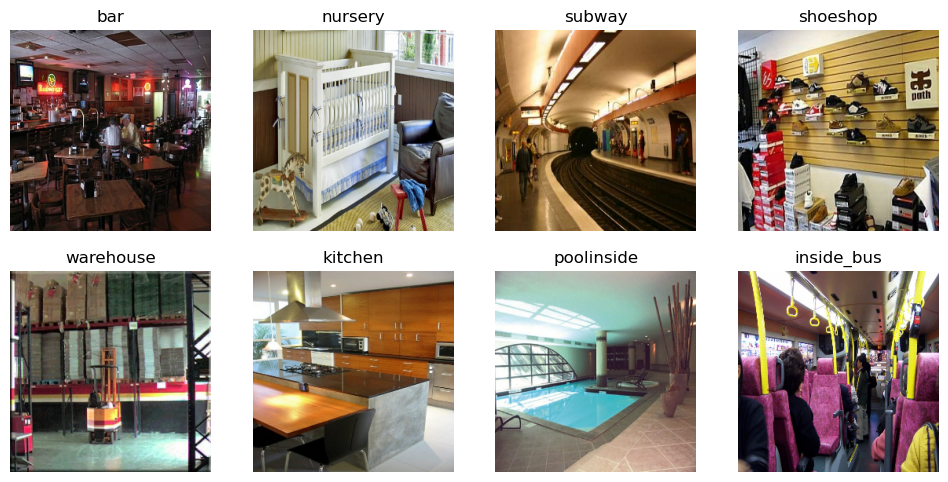

In [ ]:
#importing libraries
import matplotlib.pyplot as plt

#visualizing training data
# we resize all the original images with different sizes to the same size
plt.figure(figsize=(12, 12))
for img, lab in train_data.take(1):
  # we only plot 8 images out of 16 images (16 images = 1 batch)
  for i in range(8):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(img[i].numpy().astype("uint16"))
    # Map the label index to name
    #lab[i]: label encoding
    plt.title(indoor_dir[lab[i]]) 
    plt.axis("off")

Finally, we will loop of the datasets to confirm the shapes of the image_batch and labels_batch in the train_data.

In [ ]:
#finding shapes of image_batch and labels_batch
for image_batch, labels_batch in train_data:
  print(f'''image_batch.shape = {image_batch.shape};
labels_batch.shape = {labels_batch.shape } ''')
  break

image_batch.shape = (16, 256, 256, 3);
labels_batch.shape = (16,) 


As we can see, there are 16 images in one batch, the images are 256x256, and there are three color channels for RGB.

##2.Build a baseline CNN model on the training dataset and evaluate it on the test dataset.


Before we can build a CNN, we need to configure the dataset for better performance. We will do so by using Tensorflow Autotune.

In [ ]:
#configuring the dataset for better performance
AUTOTUNE = tf.data.AUTOTUNE 
train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size=AUTOTUNE)

Now, we can finally create the CNN model.

In [ ]:
#assigning variables to used in the CNN model later
num_labels = len(indoor_dir) #61 indoor classes
image_channel = 3 #

#creating first CNN model
model_1 = tf.keras.Sequential([
  #normalizing pixel values so they fall within the range of [0,1]
  layers.experimental.preprocessing.Rescaling(1.0/255.0, input_shape=(image_height, image_width, image_channel)),
  
  #adding first convolution layer
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  
  #adding the first max pooling layer
  layers.MaxPooling2D((3)),

  #adding second convolution layer
  layers.Conv2D(64, 3, padding='same', activation='relu'),

  #adding the second max pooling layer
  layers.MaxPooling2D((3)),

  #adding third convolution layer
  layers.Conv2D(128, 3, padding='same', activation='relu'),

  #we need to change the dimensions of the output array to 2D to make it work with the classification algorithm, 
  #so we will add a flatten layer
  layers.Flatten(),
  
  #adding first layer for classification
  layers.Dense(256, activation='relu'),

  #adding second layer for classification
  layers.Dense(128, activation='relu'),

  #since we have 61 labels, we need to have 61 neurons for the final output classification layer; activation=None
  #we will use num_labels we created earlier since it's already set to the number of indoor scene classes
  layers.Dense(num_labels, activation=None)
])

#building model to specify input shape
model_1.build(input_shape=(None, image_height, image_width, image_channel))

#summarizing model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       7

Next, let's configure the model. We will use the **adam** optimizer. We will also use **SparseCategoricalCrossentropy** since we encoded the labels as integers. Also, since we set the **activation=None**, we have to set **from_logits=True**.

In [ ]:
#configuring the model
model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) #we want to use accuracy as the metric for the model

We will also implement early callbacks. The training will stop if the validation accuracy does not improve for 5 epochs.

In [ ]:
#adding early stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience= 5)

Finally, we can train the model.

In [ ]:
%%time
#training the model and storing the history in a variable to plot later
history = model_1.fit(train_data, 
                    epochs=50, 
                    validation_data=val_data,
                    callbacks=[callback],
                    verbose = 1)

Epoch 1/50
703/703 [==============================] - 334s 434ms/step - loss: 3.6879 - accuracy: 0.0984 - val_loss: 3.4507 - val_accuracy: 0.1444
Epoch 2/50
703/703 [==============================] - 316s 450ms/step - loss: 3.1787 - accuracy: 0.1875 - val_loss: 3.0246 - val_accuracy: 0.2298
Epoch 3/50
703/703 [==============================] - 328s 466ms/step - loss: 2.5640 - accuracy: 0.3123 - val_loss: 3.0344 - val_accuracy: 0.2490
Epoch 4/50
703/703 [==============================] - 302s 429ms/step - loss: 1.5834 - accuracy: 0.5546 - val_loss: 3.5278 - val_accuracy: 0.2273
Epoch 5/50
703/703 [==============================] - 288s 409ms/step - loss: 0.5390 - accuracy: 0.8399 - val_loss: 4.9788 - val_accuracy: 0.2263
Epoch 6/50
703/703 [==============================] - 289s 411ms/step - loss: 0.1864 - accuracy: 0.9501 - val_loss: 6.9286 - val_accuracy: 0.1893
Epoch 7/50
703/703 [==============================] - 294s 418ms/step - loss: 0.1078 - accuracy: 0.9712 - val_loss: 7.0041 -

Let's evaluate the model by visualizing its history.

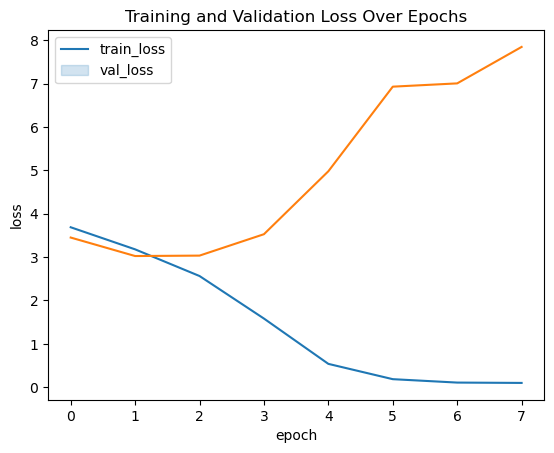

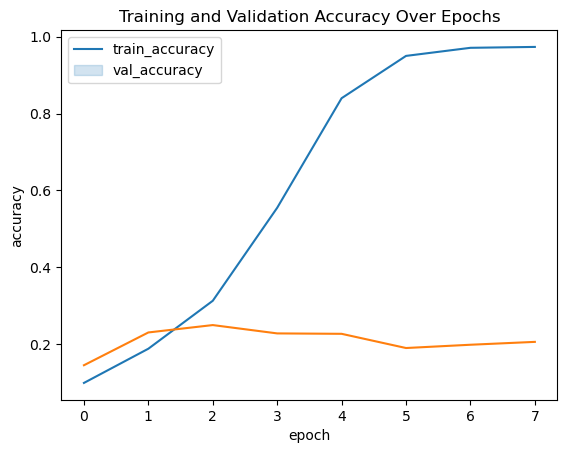

In [ ]:
#plotting the model's history
import seaborn as sns
import pandas as pd

train_history = pd.DataFrame(history.history)
train_history['epoch'] = history.epoch
#plotting train loss
sns.lineplot(x='epoch', y ='loss', data =train_history)
#plotting validation loss
sns.lineplot(x='epoch', y ='val_loss', data =train_history)
#adding legends
plt.legend(labels=['train_loss', 'val_loss'])
plt.title('Training and Validation Loss Over Epochs')
plt.show()

#plotting training accuracy
sns.lineplot(x='epoch', y ='accuracy', data =train_history)
#Plot validation accuracy
sns.lineplot(x='epoch', y ='val_accuracy', data =train_history)
#Add legends
plt.legend(labels=['train_accuracy', 'val_accuracy'])
plt.title('Training and Validation Accuracy Over Epochs')
plt.show()

As we can see from the first graph, there is a huge gap between the training and validation loss. Initially, both the training and validation loss decreased in the first few epochs; however, the validation loss began to increase as the number epochs increase. The lack of convergence is a sign that the model is not properly learning. It also appears that the model is overfitting the training data, and we can see that in the second graph because the accuracy is high for the training data, but extremely low for the validation data.  

Now, let's create a classification report to evaluate the model on the test dataset.

In [ ]:
#creating array of predicted values (as integers)
pred_prod = model_1.predict(val_data)
pred_int = np.argmax(pred_prod, axis=-1)

#creating array of actual values from val_data (as integers)
val_labels = val_data.map(lambda x, y: y).unbatch() #extracting labels from val_data
actual_int = np.array(list(val_labels.as_numpy_iterator())) #converting labels to int

#mapping integers to labels
indoor_labels = np.array(indoor_dir) #converting indoor_dir to numpy array to map labels
pred_labels = np.array(indoor_labels)[pred_int]
actual_labels = np.array(indoor_labels)[actual_int]

#creating classification report
print(classification_report(pred_labels, actual_labels, target_names=indoor_labels))


176/176 [==============================] - 19s 108ms/step
                     precision    recall  f1-score   support

     airport_inside       0.29      0.28      0.28       130
          artstudio       0.05      0.03      0.04        35
         auditorium       0.11      0.15      0.13        27
             bakery       0.18      0.18      0.18        87
                bar       0.12      0.12      0.12       112
           bathroom       0.10      0.50      0.17         8
            bedroom       0.42      0.31      0.36       187
          bookstore       0.13      0.12      0.13        81
            bowling       0.11      0.28      0.16        18
             buffet       0.10      0.05      0.06        44
             casino       0.38      0.30      0.33       128
      children_room       0.05      0.09      0.06        11
      church_inside       0.15      0.29      0.20        17
          classroom       0.04      0.06      0.04        18
           cloister       

Because we have an imbalanced dataset, we will look at the weighted average (wtd. avg.). Also, since F1-scores combine precision and recall, we will focus on that the most. The wtd. avg. F1-score is 0.21, and the F1 scores are low for most categories, which means this model did not perform well when making predictions on the test dataset. Overall, this is not a good model.

##3.Build a second CNN model with data augmentation and dropout and evaluate it on the test dataset.


Let's see if data augmentation and dropout will increase our model's performance.

In [ ]:
#specifying dropout rate
dropout_rate = 0.3

model_2 = tf.keras.Sequential([
    
  #adding data augmentation layers
  layers.experimental.preprocessing.RandomTranslation(height_factor=0.2,width_factor = 0.2),
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", input_shape=(image_height,image_width,image_channel)),
  layers.experimental.preprocessing.RandomRotation(0.3),

  #normalizing pixel values so they fall within the range of [0,1]
  layers.experimental.preprocessing.Rescaling(1.0/255.0, input_shape=(image_height, image_width, image_channel)),
  
  #adding first convolution layer
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  
  #adding the first max pooling layer
  layers.MaxPooling2D((3)),

  #adding second convolution layer
  layers.Conv2D(64, 3, padding='same', activation='relu'),

  #adding the second max pooling layer
  layers.MaxPooling2D((3)),

  #adding third convolution layer
  layers.Conv2D(128, 3, padding='same', activation='relu'),

  #we need to change the dimensions of the output array to 2D to make it work with the classification algorithm, 
  #so we will add a flatten layer
  layers.Flatten(),
  
  #adding first layer for classification
  layers.Dense(256, activation='relu'),

  #adding dropout layer
  layers.Dropout(rate = dropout_rate),

  #adding second layer for classification
  layers.Dense(128, activation='relu'),

  #since we have 61 labels, we need to have 61 neurons for the final output later; activation=None
  #we will use num_labels we created earlier since it's already set to the number of indoor scene classes
  layers.Dense(num_labels, activation=None)
])

#building model to specify input shape
model_2.build(input_shape=(None, image_height, image_width, image_channel))

#summarizing model
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_translation (RandomT  (None, 256, 256, 3)      0         
 ranslation)                                                     
                                                                 
 random_flip (RandomFlip)    (None, 256, 256, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 256, 256, 3)      0         
 tion)                                                           
                                                                 
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 85, 85, 32)      

Next, let's configure the model using the same settings as before.

In [ ]:
#configuring the model
model_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) #we want to use accuracy as the metric for the model

Finally, we can train the model.

In [ ]:
%%time
#training the model and storing the history in a variable to plot later
history = model_2.fit(train_data, 
                    epochs=50, 
                    validation_data=val_data,
                    callbacks=[callback],                    
                    verbose = 1)

Epoch 1/50
703/703 [==============================] - 313s 444ms/step - loss: 3.9088 - accuracy: 0.0643 - val_loss: 3.7254 - val_accuracy: 0.0928
Epoch 2/50
703/703 [==============================] - 261s 371ms/step - loss: 3.7225 - accuracy: 0.0849 - val_loss: 3.5208 - val_accuracy: 0.1163
Epoch 3/50
703/703 [==============================] - 199s 283ms/step - loss: 3.5536 - accuracy: 0.1161 - val_loss: 3.4520 - val_accuracy: 0.1252
Epoch 4/50
703/703 [==============================] - 200s 284ms/step - loss: 3.4718 - accuracy: 0.1246 - val_loss: 3.4502 - val_accuracy: 0.1327
Epoch 5/50
703/703 [==============================] - 204s 290ms/step - loss: 3.4335 - accuracy: 0.1300 - val_loss: 3.4095 - val_accuracy: 0.1309
Epoch 6/50
703/703 [==============================] - 207s 295ms/step - loss: 3.3776 - accuracy: 0.1388 - val_loss: 3.3138 - val_accuracy: 0.1366
Epoch 7/50
703/703 [==============================] - 206s 293ms/step - loss: 3.3570 - accuracy: 0.1354 - val_loss: 3.2851 -

Let's evaluate the model by visualizing it's history.

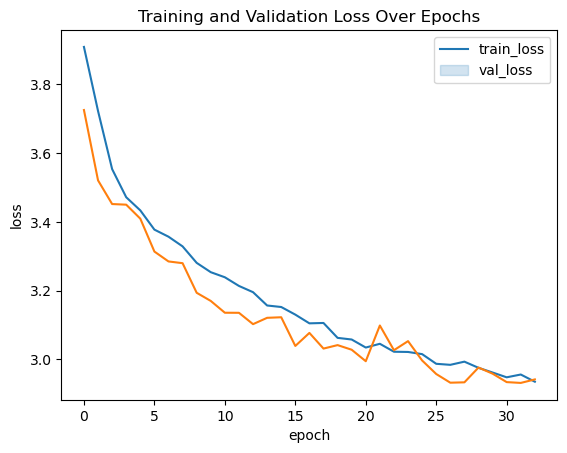

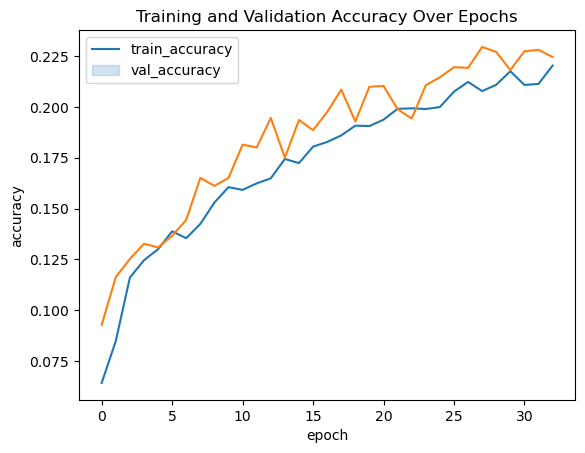

In [ ]:
#plotting the model's history
import seaborn as sns
import pandas as pd

train_history = pd.DataFrame(history.history)
train_history['epoch'] = history.epoch
#plotting train loss
sns.lineplot(x='epoch', y ='loss', data =train_history)
#plotting validation loss
sns.lineplot(x='epoch', y ='val_loss', data =train_history)
#adding legends
plt.legend(labels=['train_loss', 'val_loss'])
plt.title('Training and Validation Loss Over Epochs')
plt.show()

#plotting training accuracy
sns.lineplot(x='epoch', y ='accuracy', data =train_history)
#Plot validation accuracy
sns.lineplot(x='epoch', y ='val_accuracy', data =train_history)
#Add legends
plt.legend(labels=['train_accuracy', 'val_accuracy'])
plt.title('Training and Validation Accuracy Over Epochs')
plt.show()

From the first graph, we can see that both the training and validation loss decrease as the number of epochs increase. When we compare this graph to the first model's training and validation loss graph, we can see that the inclusion of dropout and data augmentation layers helped reduce over-fitting. From the second graph, we can see that the model's accuracy peaks around 0.2, which suggests that this may not be a good model.

Let's look at the classification report.

In [ ]:
#creating array of predicted values (as integers)
pred_prod = model_2.predict(val_data)
pred_int = np.argmax(pred_prod, axis=-1)

#creating array of actual values from val_data (as integers)
val_labels = val_data.map(lambda x, y: y).unbatch() #extracting labels from val_data
actual_int = np.array(list(val_labels.as_numpy_iterator())) #converting labels to int

#mapping integers to labels
indoor_labels = np.array(indoor_dir) #converting indoor_dir to numpy array to map labels
pred_labels = np.array(indoor_labels)[pred_int]
actual_labels = np.array(indoor_labels)[actual_int]

#creating classification report
print(classification_report(pred_labels, actual_labels, target_names=indoor_labels))

176/176 [==============================] - 16s 87ms/step
                     precision    recall  f1-score   support

     airport_inside       0.33      0.34      0.34       121
          artstudio       0.00      0.00      0.00         0
         auditorium       0.17      0.24      0.20        25
             bakery       0.18      0.15      0.16       107
                bar       0.38      0.18      0.25       255
           bathroom       0.10      0.80      0.18         5
            bedroom       0.24      0.29      0.26       113
          bookstore       0.24      0.13      0.17       141
            bowling       0.11      0.13      0.12        38
             buffet       0.00      0.00      0.00         0
             casino       0.61      0.33      0.42       184
      children_room       0.00      0.00      0.00         4
      church_inside       0.06      0.12      0.08        16
          classroom       0.00      0.00      0.00         0
           cloister       0

/Users/symphonyhopkins/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/symphonyhopkins/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/symphonyhopkins/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The wtd. avg. F1-score is 0.26 (and the F1-scores for most categories are low too), which means it is not a good model. 

##4.Build a third CNN model based on the pre-trained model(transfer learning) and evaluate it on the test dataset.


Let's see if using a transfer learning will improve the model's performance. For this section, we will use **tf.keras.applications.resnet50** and set up the layers that we will use for the pre-trained model.

In [ ]:
#importing pre-trained ResNet50 model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

#specifiying the image size for our dataset
IMG_SHAPE = (image_height, image_width, image_channel)

resnet_model = ResNet50(weights='imagenet',
                        include_top=False,
                        input_shape = IMG_SHAPE)

94765736/94765736 [==============================] - 15s 0us/step


 Next, let's freeze the convolutional base so that we don't retrain this model.

In [ ]:
#freezing convolutional base
resnet_model.trainable = False

Finally, we can create the model.


In [ ]:
#specifying the input size of the images
inputs = tf.keras.Input(shape = IMG_SHAPE)

#creating data augmentation layer
data_aug = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomTranslation(height_factor=0.2,width_factor = 0.2),
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", input_shape=(image_height,image_width,image_channel)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.3)
])
#passing inputs through data_aug layer
x = data_aug(inputs)

#passing inputs through preprocess layer that we imported earlier
x = preprocess_input(x)

#freeze the convolutional base so that we don't retrain the weights
#passing inputs through model
x = resnet_model(x, training=False)

#converting 4D to a 2D using Flatten; we also used flatten instead of global average pooling to retain information
flatten_layer = tf.keras.layers.Flatten()
x= flatten_layer(x)

#applying the classification layer since we did not include it when we retrieved the ResNet50 model (include_top=False).
#we have 61 indoor classes; we'll use num_labels since it contains that information
classification_layer = tf.keras.layers.Dense(num_labels)
outputs = classification_layer(x)

#using the functional API approach to combine the inputs and outputs together
model_3 = tf.keras.Model(inputs, outputs)

We will configure the model using the same settings as before.

In [ ]:
#configuring model
model_3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Let's look at the model summary.

In [ ]:
model_3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 256, 256, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 256, 256, 3)      0         
                                                                 
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 131072)            0         
                                                             

Now we can train the model.

In [ ]:
%%time
#training the model and storing the history in a variable to plot later
history = model_3.fit(train_data, 
                    epochs=50, 
                    validation_data=val_data,
                    callbacks=[callback],
                    verbose = 1)

Epoch 1/50
703/703 [==============================] - 872s 1s/step - loss: 41.8416 - accuracy: 0.3313 - val_loss: 35.9135 - val_accuracy: 0.5123
Epoch 2/50
703/703 [==============================] - 869s 1s/step - loss: 43.9165 - accuracy: 0.4494 - val_loss: 45.5656 - val_accuracy: 0.5358
Epoch 3/50
703/703 [==============================] - 869s 1s/step - loss: 43.4900 - accuracy: 0.5072 - val_loss: 51.0475 - val_accuracy: 0.5333
Epoch 4/50
703/703 [==============================] - 865s 1s/step - loss: 43.5646 - accuracy: 0.5395 - val_loss: 51.9345 - val_accuracy: 0.5781
Epoch 5/50
703/703 [==============================] - 873s 1s/step - loss: 43.0519 - accuracy: 0.5586 - val_loss: 56.5978 - val_accuracy: 0.5468
Epoch 6/50
703/703 [==============================] - 871s 1s/step - loss: 44.7192 - accuracy: 0.5729 - val_loss: 52.8129 - val_accuracy: 0.5994
Epoch 7/50
703/703 [==============================] - 880s 1s/step - loss: 44.9367 - accuracy: 0.5800 - val_loss: 52.2957 - val_ac

Let's evaulate the model by visualizing its history.

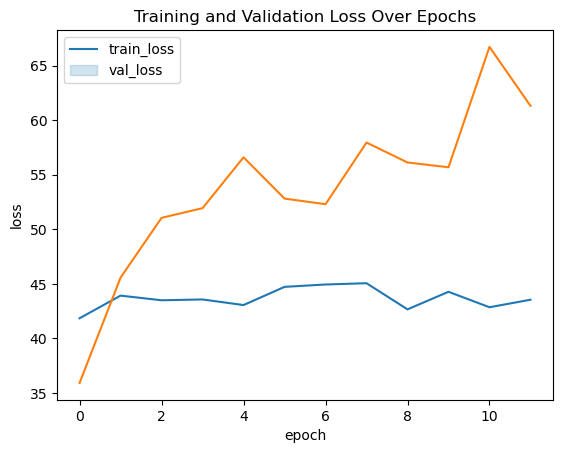

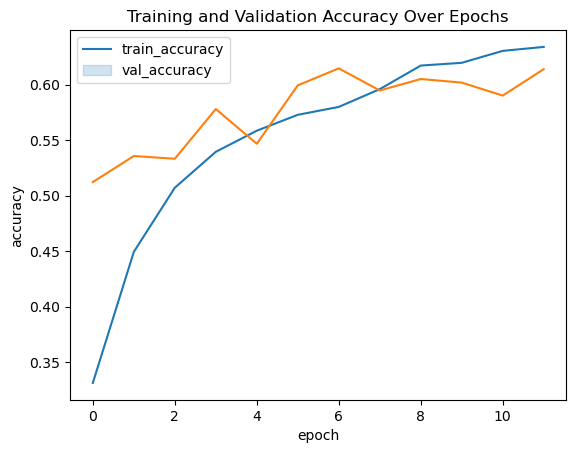

In [ ]:
#plotting model's history
train_history = pd.DataFrame(history.history)
train_history['epoch'] = history.epoch
#plotting train loss
sns.lineplot(x='epoch', y ='loss', data =train_history)
#plotting validation loss
sns.lineplot(x='epoch', y ='val_loss', data =train_history)
#adding legends
plt.legend(labels=['train_loss', 'val_loss'])
plt.title('Training and Validation Loss Over Epochs')
plt.show()

#plotting training accuracy
sns.lineplot(x='epoch', y ='accuracy', data =train_history)
#Plot validation accuracy
sns.lineplot(x='epoch', y ='val_accuracy', data =train_history)
#Add legends
plt.legend(labels=['train_accuracy', 'val_accuracy'])
plt.title('Training and Validation Accuracy Over Epochs')
plt.show() 

From the first graph, we can see that there is a gap between the training and validation loss. The validation loss is greater than the training loss and it also seems to be on an increasing trend, so these characteristics indicate that the model is over-fitting. From the second graph, we can see that the accuracies increased as the number of epochs increased.

Now, let's create a classification report to evaluate the model on test data.

In [ ]:
#creating array of predicted values (as integers)
pred_prod = model_3.predict(val_data)
pred_int = np.argmax(pred_prod, axis=-1)

#creating array of actual values from val_data (as integers)
val_labels = val_data.map(lambda x, y: y).unbatch() #extracting labels from val_data
actual_int = np.array(list(val_labels.as_numpy_iterator())) #converting labels to int

#mapping integers to labels
indoor_labels = np.array(indoor_dir) #converting indoor_dir to numpy array to map labels
pred_labels = np.array(indoor_labels)[pred_int]
actual_labels = np.array(indoor_labels)[actual_int]

#creating classification report
print(classification_report(pred_labels, actual_labels, target_names=indoor_labels))

176/176 [==============================] - 171s 966ms/step
                     precision    recall  f1-score   support

     airport_inside       0.58      0.47      0.52       151
          artstudio       0.23      0.62      0.33         8
         auditorium       0.49      0.41      0.45        41
             bakery       0.40      0.88      0.55        40
                bar       0.47      0.60      0.52        94
           bathroom       0.64      0.83      0.72        30
            bedroom       0.86      0.75      0.81       159
          bookstore       0.86      0.44      0.58       152
            bowling       0.58      0.93      0.71        28
             buffet       0.81      0.57      0.67        30
             casino       0.90      0.80      0.85       111
      children_room       0.45      0.33      0.38        27
      church_inside       0.65      1.00      0.79        22
          classroom       0.37      0.77      0.50        13
           cloister      

The wtd. avg. F1-score is 0.62, which makes it an okay model. It is not good but it can classify some indoor scenes well (e.g. Casino, Cloister, Indoor Subway, and Warehouse have F1 scores equal to or greater than .80).

##5.Which model do you recommend for the model in Q2, Q3, and Q4? Justify your answer.


Since we had an imbalanced dataset, we evaluated the models based on their wtd. avg. F1-scores (which combines precision and recall):
+ Model 1: 0.21
+ Model 2: 0.26
+ Model 3: 0.62

Based on the results, we would recommend Model 3 because it had the highest wtd. avg. F1-score; however, there is room for improvement for this model (i.e., improve the accuracy for more classes).

